In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
loan_data = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Study material\Loan_default.csv\Loan_default.csv")
loan_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [2]:
loan_data.shape

(255347, 18)

The dataset contains 255,347 records and 18 features.

In [3]:
loan_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  str    
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  str    
 11  EmploymentType  255347 non-null  str    
 12  MaritalStatus   255347 non-null  str    
 13  HasMortgage     255347 non-null  str    
 14  HasDependents   255347 non-null  str    
 15  LoanPurpose     255347 non-null  str    
 16  HasCoSigner     255347 non-null  str    
 17  Default         25534

There are no missing values, as all columns have 255,347 non-null entries.
The target variable is Default, which represents whether the borrower defaulted on the loan.

In [4]:
loan_data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


-> The average age of borrowers is approximately 44 years, ranging from 18 to 69 years.
-> The mean annual income is around 82,499, with values ranging between 15,000 and 149,999.
-> The average loan amount is approximately 127,578.
-> The average credit score is 574, indicating moderate creditworthiness among borrowers.
-> The average interest rate is 13.49%, with a maximum of 25%.
-> The average Debt-to-Income (DTI) ratio is 0.50, suggesting that borrowers use around 50% of their income for debt obligations.
-> The Default variable has a mean of 0.116, indicating that approximately 11.6% of borrowers defaulted. This confirms that the dataset is imbalanced, with fewer default cases.

In [5]:
print(loan_data.columns)

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='str')


In [6]:
loan_data.columns=loan_data.columns.str.strip()

In [7]:
loan_data['Loan_to_income']=loan_data['LoanAmount']/loan_data['Income']

This measures loan burden relative to income. Higher values may indicate higher repayment risk.

In [8]:
loan_data['Income_per_creditline']=loan_data['Income']/(loan_data['NumCreditLines']+1)

This reflects income capacity per credit obligation.

In [9]:
loan_data['Employment_Years']=loan_data['MonthsEmployed']/12

This converts employment duration into years for better interpretability.

In [10]:
loan_data[['Loan_to_income','Income_per_creditline','Employment_Years']].head()

,Loan_to_income,Income_per_creditline,Employment_Years
0,0.588262,17198.80,6.666667
1,2.467481,25216.00,1.250000
2,1.534154,21052.00,2.166667
3,1.412638,7928.25,0.000000
4,0.447179,4087.40,0.666667


In [11]:
loan_data[['Loan_to_income','Income_per_creditline','Employment_Years']].describe()

,Loan_to_income,Income_per_creditline,Employment_Years
count,255347.000000,255347.000000,255347.000000
mean,2.177480,26458.917769,4.961831
std,2.178357,16251.214574,2.886948
min,0.033749,3000.000000,0.000000
25%,0.803628,13925.166667,2.500000
50%,1.546720,23567.600000,5.000000
75%,2.671744,35009.583333,7.500000
max,16.532460,74998.500000,9.916667


-> Loan_to_income ratio has an average of 2.17, with values ranging up to 16.53. Higher values indicate that the loan amount is large relative to income, which may increase default risk.
-> Income_per_creditline has a mean of 26,458. This feature measures income capacity per active credit line. Lower values may indicate financial stress due to multiple credit obligations.
-> Employment_Years has an average of 4.96 years, ranging from 0 to approximately 9.9 years. Longer employment duration generally indicates financial stability and lower default probability.

In [12]:
binary_cols=['HasMortgage','HasDependents','HasCoSigner']
for col in binary_cols:
    loan_data[col]=loan_data[col].map({'Yes':1,'No':0})

In [13]:
loan_data[['HasMortgage','HasDependents','HasCoSigner']].head()

,HasMortgage,HasDependents,HasCoSigner
0,1,1,1
1,0,0,1
2,1,1,0
3,0,0,0
4,0,1,0


In [14]:
categorical_cols=['Education','EmploymentType','MaritalStatus','LoanPurpose']
loan_data=pd.get_dummies(loan_data,columns=categorical_cols,drop_first=True)

In [15]:
loan_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,False,False,False,False,False,False,False,False,False,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,False,False,False,False,True,False,False,False,False,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,False,False,False,True,False,False,False,False,False,False
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,False,False,False,False,True,False,True,False,False,False
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,False,False,False,True,False,False,False,False,False,False


In [16]:
print(loan_data.columns)

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'Default',
       'Loan_to_income', 'Income_per_creditline', 'Employment_Years',
       'Education_High School', 'Education_Master's', 'Education_PhD',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='str')


In [17]:
loan_data['Income_Group']=pd.qcut(loan_data['Income'],q=8,labels=False)

In [18]:
loan_data['Income_Group'].value_counts()

Income_Group
4    31920
2    31919
0    31919
5    31919
1    31918
7    31918
3    31918
6    31916
Name: count, dtype: int64

In [19]:
income_default_rate=loan_data.groupby('Income_Group')['Default'].mean()
income_default_rate

Income_Group
0    0.212507
1    0.135096
2    0.111470
3    0.099286
4    0.097588
5    0.092672
6    0.092305
7    0.088101
Name: Default, dtype: float64

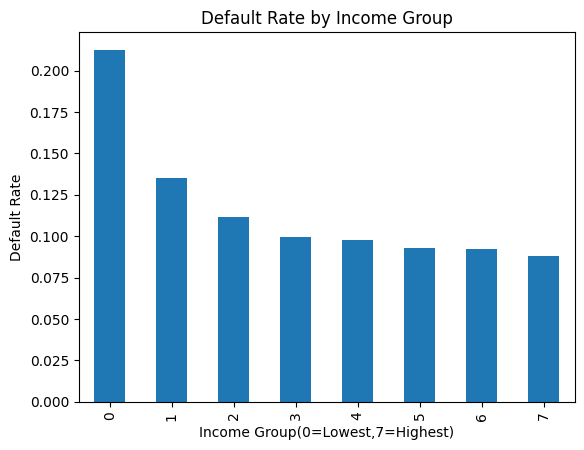

In [20]:
income_default_rate.plot(kind='bar')
plt.title("Default Rate by Income Group")
plt.xlabel("Income Group(0=Lowest,7=Highest)")
plt.ylabel("Default Rate")
plt.show()

To analyze the relationship between income and loan default, income was divided into 8 equal groups (0 = lowest income, 7 = highest income).
The default rate across income groups shows a clear decreasing trend:
--Income Group 0 (lowest income) has the highest default rate (~21%).
--As income increases, the default rate steadily declines.
--Income Group 7 (highest income) has the lowest default rate (~8.8%).
This indicates a strong negative relationship between income and default probability. Borrowers with lower income levels are significantly more likely to default compared to higher-income borrowers.
--> Lower-income borrowers may face higher financial stress and limited repayment capacity.
--> Higher-income borrowers demonstrate better financial stability and lower default risk.

In [21]:
loan_data['CreditScore_Group']=pd.qcut(loan_data['CreditScore'],q=8,labels=False)
creditscore_default_rate=loan_data.groupby('CreditScore_Group')['Default'].mean()

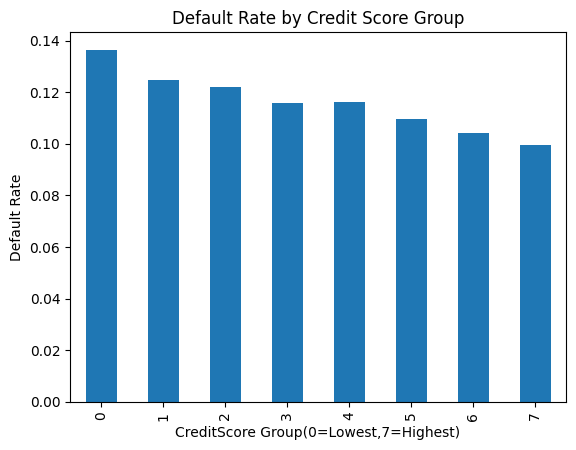

In [22]:
creditscore_default_rate.plot(kind='bar')
plt.title("Default Rate by Credit Score Group")
plt.xlabel("CreditScore Group(0=Lowest,7=Highest)")
plt.ylabel("Default Rate")
plt.show()

The results show a clear decreasing trend in default rate as credit score increases:
---Credit Score Group 0 (lowest scores) has the highest default rate (around 14%).
---The default rate steadily declines across higher credit score groups.
---Credit Score Group 7 (highest scores) has the lowest default rate (around 9%).
--> Borrowers with lower credit scores have a higher likelihood of default.
--> Higher credit scores indicate better repayment history and financial discipline.

In [23]:
loan_data['LoanAmount_Group']=pd.qcut(loan_data['LoanAmount'],q=8,labels=False)
loanamount_default_rate=loan_data.groupby('LoanAmount_Group')['Default'].mean()

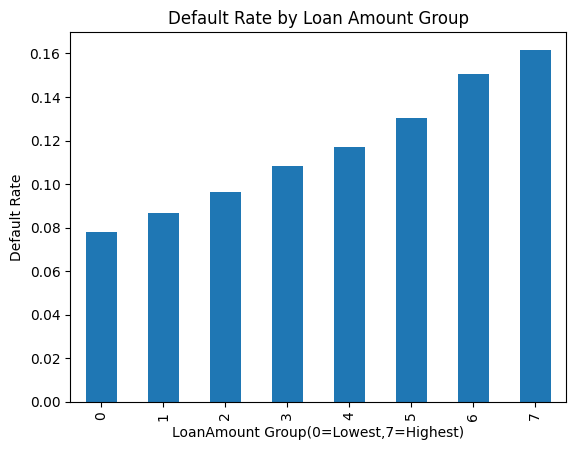

In [24]:
loanamount_default_rate.plot(kind='bar')
plt.title("Default Rate by Loan Amount Group")
plt.xlabel("LoanAmount Group(0=Lowest,7=Highest)")
plt.ylabel("Default Rate")
plt.show()

-> Loan Amount Group 0 (lowest loan amounts) has the lowest default rate (approximately 7.5%–8%).
-> Loan Amount Group 7 (highest loan amounts) has the highest default rate (approximately 16%).
-> The default rate steadily increases across higher loan amount groups.
Larger loan amounts increase the repayment burden on borrowers.
Higher financial obligation may lead to greater repayment difficulty.
Borrowers with high loan amounts are significantly more likely to default compared to those with smaller loans.

In [25]:
loan_data['DTIRatio_Group']=pd.qcut(loan_data['DTIRatio'],q=8,labels=False)
dtiratio_default_rate=loan_data.groupby('DTIRatio_Group')['Default'].mean()

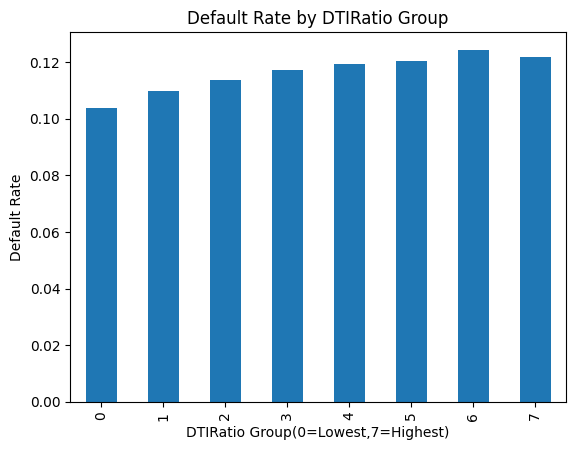

In [26]:
dtiratio_default_rate.plot(kind='bar')
plt.title("Default Rate by DTIRatio Group")
plt.xlabel("DTIRatio Group(0=Lowest,7=Highest)")
plt.ylabel("Default Rate")
plt.show()

The graph shows that the default rate increases as the DTI ratio group increases. Borrowers in the lowest DTI group (0) have the lowest default rate, while higher DTI groups have gradually higher default rates. This means that as debt-to-income ratio increases, the risk of loan default also increases. So, DTI ratio has a positive relationship with default risk.

In [27]:
loan_data['Loan-to-income Group']=pd.qcut(loan_data['Loan_to_income'],q=8,labels=False)
loan_to_income_default_rate=loan_data.groupby('Loan-to-income Group')['Default'].mean()

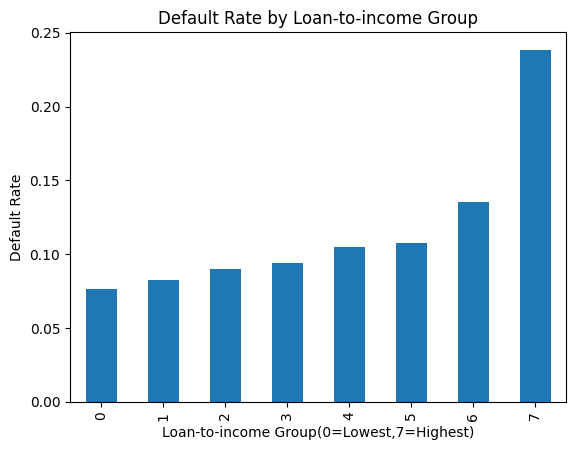

In [28]:
loan_to_income_default_rate.plot(kind='bar')
plt.title("Default Rate by Loan-to-income Group")
plt.xlabel("Loan-to-income Group(0=Lowest,7=Highest)")
plt.ylabel("Default Rate")
plt.show()

The graph shows that the default rate increases as the loan-to-income group increases. Borrowers in the lowest group (0) have the lowest default rate, while group 7 (highest loan-to-income ratio) has the highest default rate. There is a sharp increase in default rate in the highest group. This means that borrowers who take loans that are high compared to their income are more likely to default. So, loan-to-income ratio has a strong positive relationship with default risk.

In [29]:
correlation_matrix=loan_data.corr(numeric_only=True)

<function matplotlib.pyplot.show(close=None, block=None)>

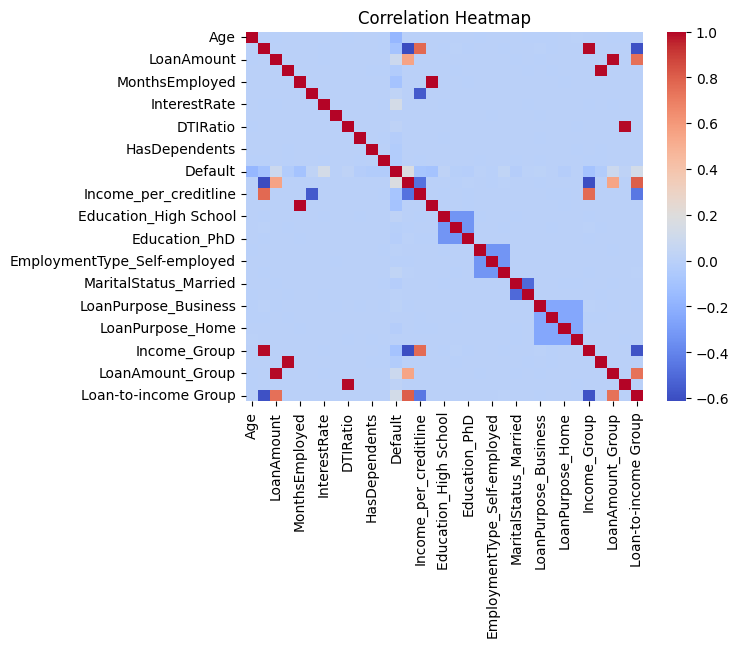

In [30]:
sns.heatmap(correlation_matrix,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show

In [31]:
loan_data[['CreditScore','Default']].corr()

,CreditScore,Default
CreditScore,1.000000,-0.034166
Default,-0.034166,1.000000


CreditScore shows a slight negative correlation with Default(-0.034), indicating that borrowers with higher credit scores are marginally less likely to default. However, the relationship is weak, suggesting that credit score alone does not strongly determine default behaviour in this dataset.

In [32]:
loan_data[['DTIRatio','Default']].corr()

,DTIRatio,Default
DTIRatio,1.000000,0.019236
Default,0.019236,1.000000


DTIRatio exhibits a very weak positive correlation (0.019) with Default. While theoretically higher debt burden increases default risk, the observed relationship in this dataset is minimal.

In [33]:
loan_data[['Income','Default']].corr()

,Income,Default
Income,1.000000,-0.099119
Default,-0.099119,1.000000


Income shows a weak negative correlation (-0.099) with Default, suggesting that higher income borrowers tend to have slightly lower default probability. However, the relationship is not strong enough to independently predict default.

In [34]:
loan_data[['Income','CreditScore']].corr()

,Income,CreditScore
Income,1.00000,-0.00143
CreditScore,-0.00143,1.00000


The correlation between Income and CreditScore is nearly zero (-0.001), indicating that income level does not strongly determine credit score within this dataset.

In [35]:
loan_data[['Loan_to_income','Default']].corr()

,Loan_to_income,Default
Loan_to_income,1.000000,0.178963
Default,0.178963,1.000000


Loan-to-Income ratio shows a moderate positive correlation (0.178) with Default, indicating that borrowers with higher repayment burden relative to income are more likely to default. This suggests that financial stress plays a meaningful role in credit risk.

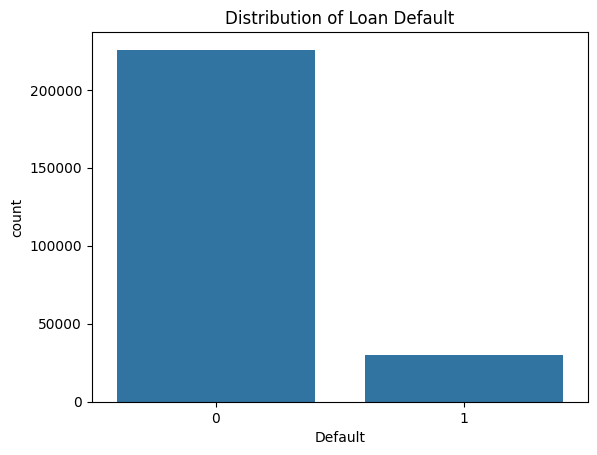

In [36]:
loan_data['Default'].value_counts()
loan_data['Default'].value_counts(normalize=True)
sns.countplot(x='Default', data=loan_data)
plt.title("Distribution of Loan Default")
plt.show()

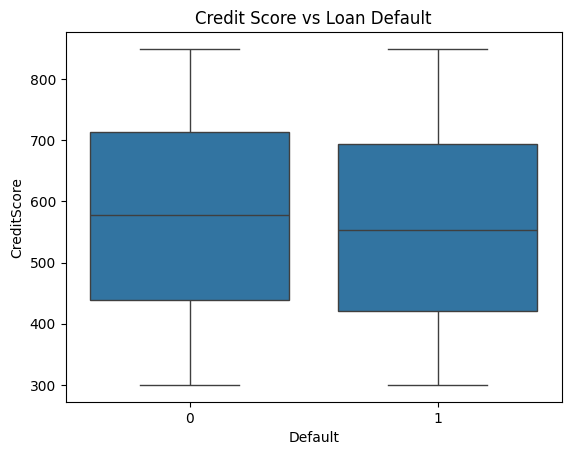

In [37]:
sns.boxplot(x='Default', y='CreditScore', data=loan_data)
plt.title("Credit Score vs Loan Default")
plt.show()

The boxplot shows that borrowers who defaulted generally have slightly lower credit scores compared to those who did not default. However, there is a large overlap between the two groups. This means credit score alone cannot clearly separate defaulters and non-defaulters, but it still plays some role in risk assessment.

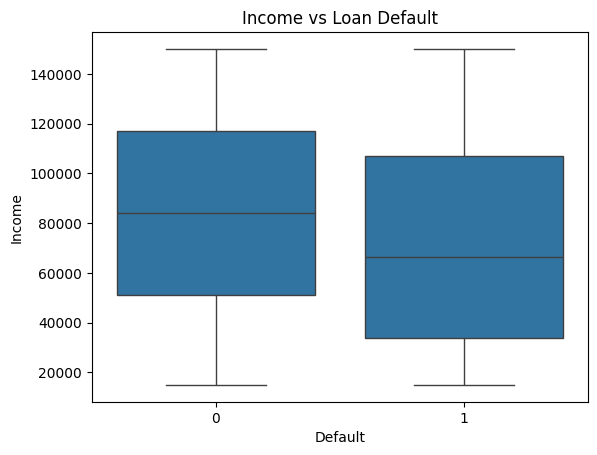

In [38]:
sns.boxplot(x='Default', y='Income', data=loan_data)
plt.title("Income vs Loan Default")
plt.show()

From the boxplot, borrowers who did not default tend to have slightly higher income compared to defaulters. However, the income ranges overlap significantly. This suggests that income alone is not enough to predict default, and other financial factors must also be considered.

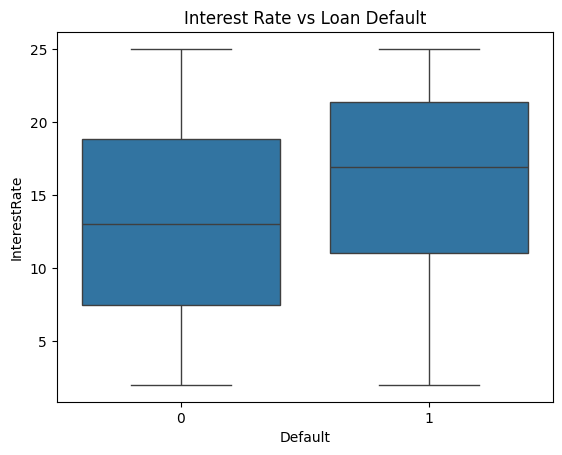

In [39]:
sns.boxplot(x='Default', y='InterestRate', data=loan_data)
plt.title("Interest Rate vs Loan Default")
plt.show()

The boxplot shows that borrowers who defaulted (1) generally have higher interest rates compared to those who did not default (0). The median interest rate is higher for defaulters. This indicates that higher interest rates are associated with higher chances of default. It suggests that interest rate has a positive relationship with loan default risk.

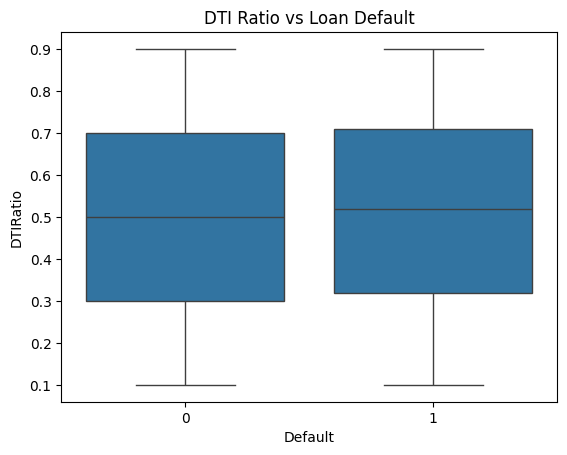

In [40]:
sns.boxplot(x='Default', y='DTIRatio', data=loan_data)
plt.title("DTI Ratio vs Loan Default")
plt.show()

The boxplot shows that borrowers who defaulted (1) have slightly higher DTI ratios compared to those who did not default (0). The median DTI ratio for defaulters is a little higher. This means that borrowers with higher debt-to-income ratios are more likely to default. So, DTI ratio has a positive relationship with loan default risk, although the difference is not very large.

In [41]:
loan_data = loan_data.drop("LoanID", axis=1)

The LoanID colummn was removed from the dataset because it is unique identifier and does not contribute to predicting loan default.

In [42]:
loan_data.isnull().sum()

Age                             0
Income                          0
LoanAmount                      0
CreditScore                     0
MonthsEmployed                  0
NumCreditLines                  0
InterestRate                    0
LoanTerm                        0
DTIRatio                        0
HasMortgage                     0
HasDependents                   0
HasCoSigner                     0
Default                         0
Loan_to_income                  0
Income_per_creditline           0
Employment_Years                0
Education_High School           0
Education_Master's              0
Education_PhD                   0
EmploymentType_Part-time        0
EmploymentType_Self-employed    0
EmploymentType_Unemployed       0
MaritalStatus_Married           0
MaritalStatus_Single            0
LoanPurpose_Business            0
LoanPurpose_Education           0
LoanPurpose_Home                0
LoanPurpose_Other               0
Income_Group                    0
CreditScore_Gr

The results indicate that there are no missing values in the dataset. Therefore, no imputation or data cleaning for null values was required.

In [43]:
loan_data = pd.get_dummies(loan_data, drop_first=True)

In [44]:
X = loan_data.drop("Default", axis=1)
y = loan_data["Default"]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The dataset was divided into training (70%) and testing(30%) subsets to evaluate model generalization performance. 

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[46873 20808]
 [ 2773  6151]]


The confusion matrix shows that the model has 20,808 False Positives and 2,773 False Negatives. This means the model incorrectly classifies many non-defaulters as defaulters, while it misses a smaller number of actual defaulters. From a risk management perspective, False Negatives are more critical because they represent risky borrowers being approved. In this model, the number of False Negatives is relatively low compared to False Positives, which reduces financial risk but may lead to loss of potential customers.

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.69      0.80     67681
           1       0.23      0.69      0.34      8924

    accuracy                           0.69     76605
   macro avg       0.59      0.69      0.57     76605
weighted avg       0.86      0.69      0.75     76605



Accuracy (69%) indicates that the model correctly predicts the loan status for 69% of the total cases. However, in imbalanced datasets, accuracy alone may not provide a complete picture of performance.

Precision (23%) indicates that only 23% of the borrowers predicted as defaulters actually defaulted. This suggests that the model classifies many safe borrowers as risky.

Recall (69%) indicates that the model successfully identifies 69% of actual defaulters. This is important because detecting risky borrowers helps reduce financial losses.

From a risk management perspective, the model achieves a good recall (0.69) for detecting defaulters,meaning it successfully identifies a significant portion of risky borrowers. However, the high number of False Positives suggests that many safe borrowers are being rejected. While this reduces financial loss due to defaults, it may decrease profitability and customer satisfaction. Overall, the model is risk-averse and prioritizes minimizing loan defaults over maximizing approvals.

-----Model Limitations & Responsible Credit Risk Analysis
1. Risks of Bias in Credit Data
Credit datasets may contain historical bias due to past lending decisions. If certain groups were historically under-approved or over-represented in defaults, the model may unintentionally learn and replicate these patterns. Therefore, fairness evaluation and bias monitoring are important before real-world deployment to ensure ethical and non-discriminatory lending practices.
2. Impact of Imbalanced Classes on Model Performance
The dataset shows class imbalance, where non-defaulters significantly outnumber defaulters. Such imbalance can influence the model to favor the majority class. Although class weighting was applied, performance metrics beyond accuracy must be considered. The model achieved an accuracy of 69%, but accuracy alone is not sufficient in imbalanced classification problems. Metrics such as precision and recall provide better insight into risk detection.
3. Consequences of Incorrect Default Predictions
The confusion matrix shows:

False Positives: 20,808
False Negatives: 2,773

The model generates a higher number of False Positives, meaning many safe borrowers are classified as risky. This may reduce lending opportunities and customer satisfaction. However, the number of False Negatives is relatively lower, which is beneficial from a financial risk perspective because fewer risky borrowers are incorrectly approved. Since False Negatives lead directly to financial losses, minimizing them is crucial in credit risk management.
4. Regulatory and Ethical Considerations
Financial institutions must comply with regulatory guidelines related to fair lending, data privacy, and transparency. Credit risk models should follow legal frameworks that prevent discrimination based on gender, religion, region, or other sensitive attributes.
In addition, ethical considerations require that customer data be handled securely and confidentially. The model should be explainable so that lending decisions can be justified if questioned by customers or regulators.
Since this model influences loan approval decisions, it must be regularly monitored, validated, and updated to ensure compliance, fairness, and reliability.
5. Why Models Should Support, Not Replace, Human Judgment

Machine learning models should assist decision-making rather than replace human expertise. While the model provides quantitative risk assessment, credit officers consider additional qualitative factors such as customer background, economic conditions, and exceptional circumstances. Therefore, model predictions should be used as decision-support tools within a broader risk management framework.